In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install tensorflow tensorflow_io matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 20.0 MB/s eta 0:00:00


Converged at epoch  130
Converged weights: [-0.1   0.1   0.05]
Predictions: [0, 0, 0, 1]




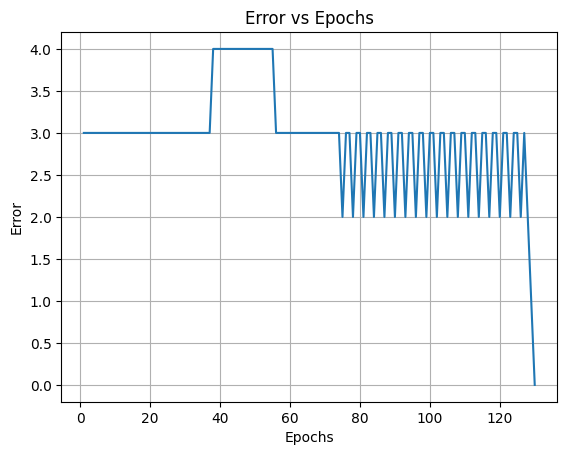


 Step
Converged at epoch  130
Converged weights: [-0.1   0.1   0.05]
Predictions: [0, 0, 0, 1]




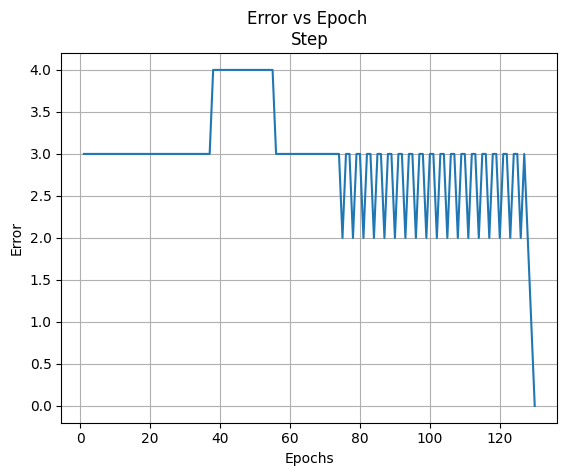


 Bipolar Step
Converged at epoch  1000
Converged weights: [-0.1   0.1   0.05]
Predictions: [-1, 1, 1, 1]




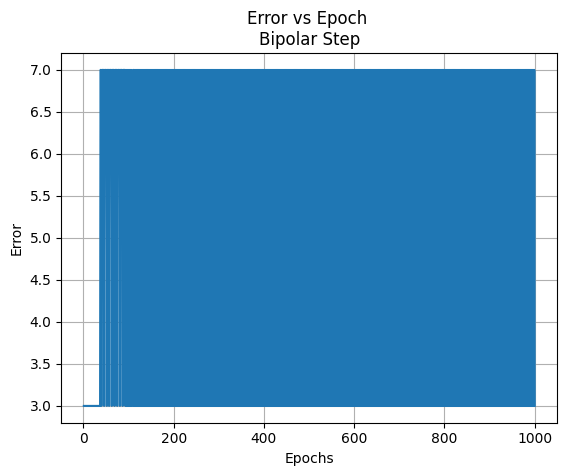


 Sigmoid
Converged at epoch  1000
Converged weights: [-6.13531308  3.97083321  3.96394835]
Predictions: [0, 0, 0, 1]




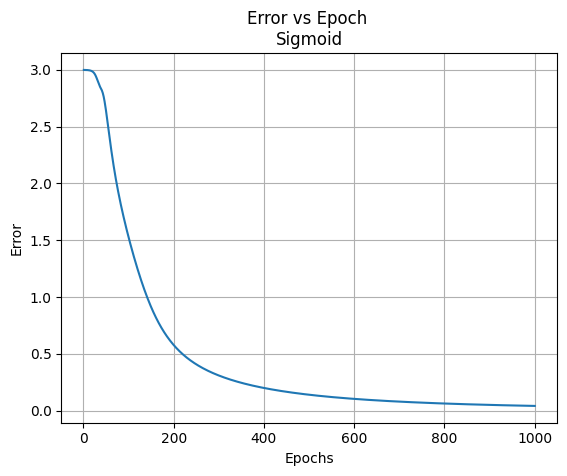


 ReLU
Converged at epoch  516
Converged weights: [-0.97719569  0.98458573  0.98415993]
Predictions: [0, 0, 0, 1]




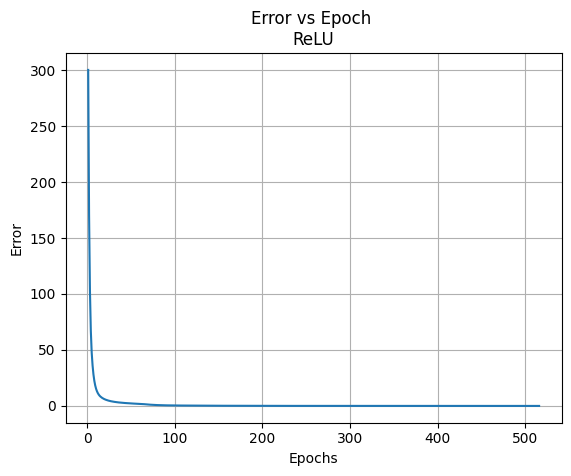

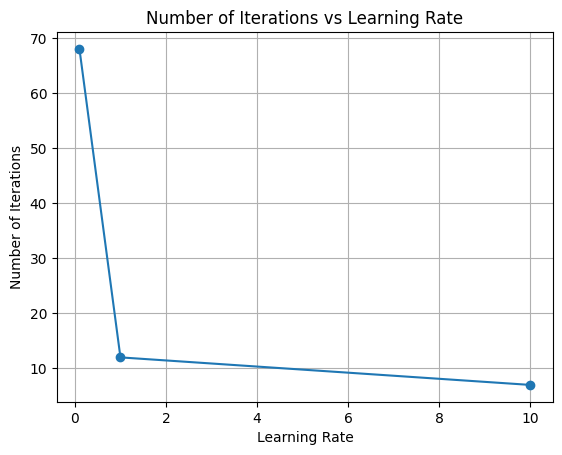

Converged at epoch  1000
Converged weights: [ 0.1 -0.1 -0.1]
Predictions: [1, 0, 0, 1]




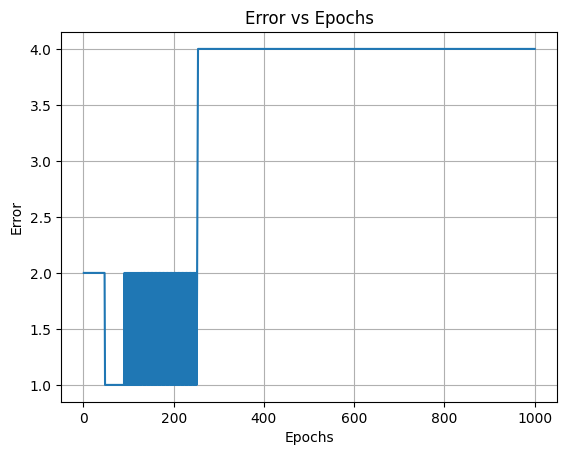


 Step
Converged at epoch  1000
Converged weights: [ 0.1 -0.1 -0.1]
Predictions: [1, 0, 0, 1]




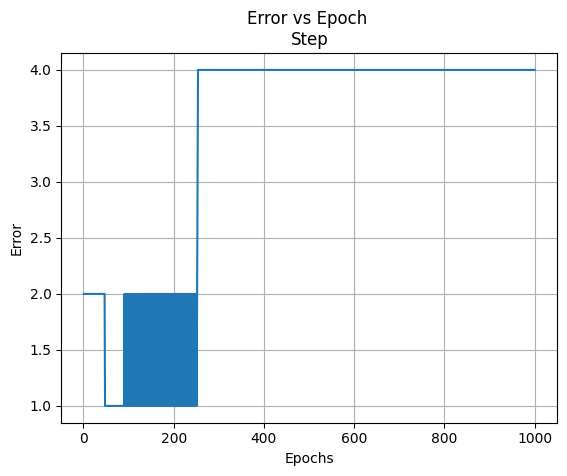


 Bipolar Step
Converged at epoch  1000
Converged weights: [ 0.2  -0.1  -0.15]
Predictions: [1, 1, -1, 1]




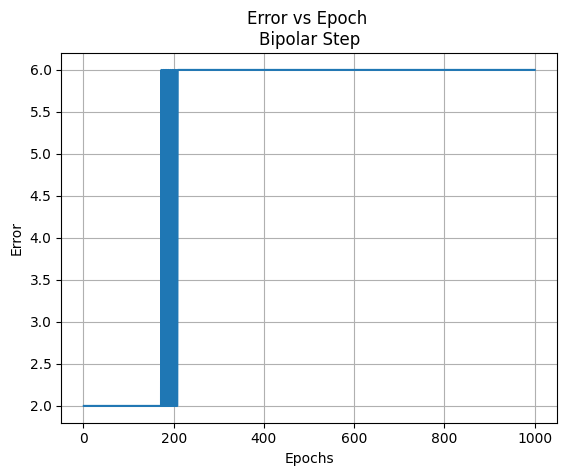


 Sigmoid
Converged at epoch  1000
Converged weights: [ 0.02876923 -0.05348673 -0.02819591]
Predictions: [1, 0, 0, 1]




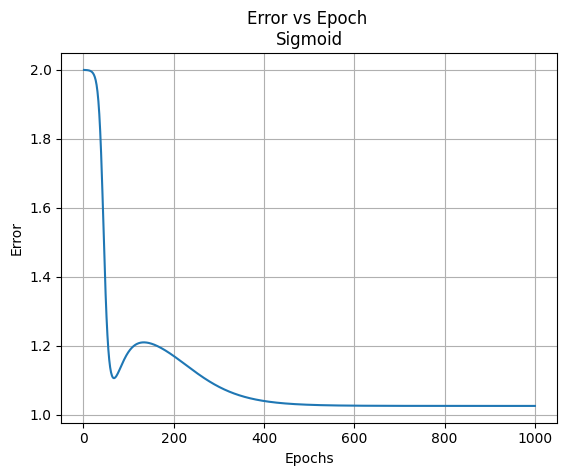


 ReLU
Converged at epoch  1000
Converged weights: [ 0.52631579 -0.05263158 -0.02631579]
Predictions: [1, 0, 0, 1]




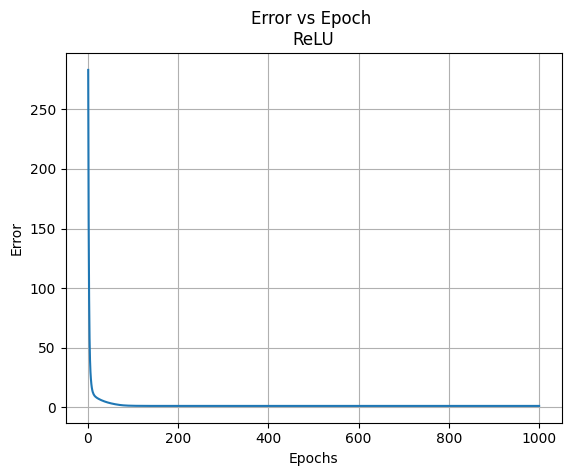

Customer_0: Predicted Value = True
Customer_1: Predicted Value = True
Customer_2: Predicted Value = True
Customer_3: Predicted Value = False
Customer_4: Predicted Value = False
Customer_5: Predicted Value = False
Customer_6: Predicted Value = True
Customer_7: Predicted Value = True
Customer_8: Predicted Value = False
Customer_9: Predicted Value = False
Customer1: Perceptron Prediction = True, Pseudo-inverse Prediction = True
Customer2: Perceptron Prediction = True, Pseudo-inverse Prediction = True
Customer3: Perceptron Prediction = True, Pseudo-inverse Prediction = True
Customer4: Perceptron Prediction = False, Pseudo-inverse Prediction = False
Customer5: Perceptron Prediction = False, Pseudo-inverse Prediction = True
Customer6: Perceptron Prediction = False, Pseudo-inverse Prediction = True
Customer7: Perceptron Prediction = True, Pseudo-inverse Prediction = True
Customer8: Perceptron Prediction = True, Pseudo-inverse Prediction = True
Customer9: Perceptron Prediction = False, Pseudo-

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R


Predicted Outputs for AND Gate:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1


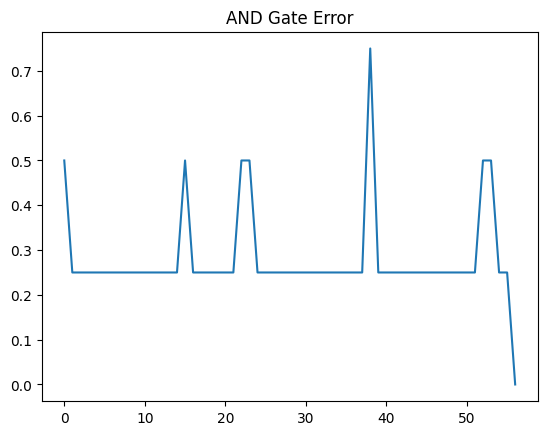

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R


Predicted Outputs for XOR Gate:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 1
Input: [1 0], Predicted: 1
Input: [1 1], Predicted: 0


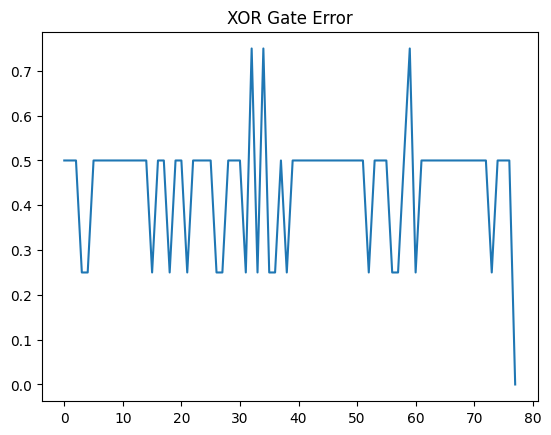

1/1 [==============================] - 0s 36ms/step
Test Accuracy (scikit-learn MLPClassifier): 0.83125


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

w0 = 10
w1 = 0.2
w2 = -0.75
learn_rate = 0.05

def step(x):
    return 1 if x >= 0 else 0

def bipolar_step(x):
    return -1 if x < 0 else 1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

def perceptron(inp, outp, w0, w1, w2, learn, active_fn, epochs=1000, converge=0.0002):
    errors = []
    W = np.array([w0, w1, w2])
    for epoch in range(epochs):
        error_sq = 0
        p = []
        for input, out in zip(inp, outp):
            weight_sum = W[0] + np.dot(input, W[1:])
            predict = active_fn(weight_sum)
            error = out - predict
            error_sq += error**2
            W[1:] += learn * error * input
            W[0] += learn * error
            p.append(predict)
        errors.append(error_sq)
        if error_sq <= converge:
            break
    return W, epoch, errors, p

def a1(inp, out, w0, w1, w2, learn_rate):
    Weight, n, errors, p = perceptron(inp, out, w0, w1, w2, learn_rate, step)
    return Weight, n, errors, p

def a2(inp, out, w0, w1, w2, learn_rate):
    results = []
    activate = [step, bipolar_step, sigmoid, relu]
    activate_name = ['Step', 'Bipolar Step', 'Sigmoid', 'ReLU']
    for active_fn, name in zip(activate, activate_name):
        Weight, n, errors, p = perceptron(inp, out, w0, w1, w2, learn_rate, active_fn)
        results.append((name, Weight, n, errors, p))
    return results

def plotg(name, errors):
    # Plot errors
    plt.plot(range(1, len(errors) + 1), errors, label=name)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f"Error vs Epoch \n{name}")
    plt.grid(True)
    plt.show()

def a3_sub(inp, out, w0, w1, w2, learn_rate):
    Weight, n, errors, p = perceptron(inp, out, w0, w1, w2, learn_rate, step)
    return n+1

def a3(inp, out, w0, w1, w2):
    learn_rates = np.array([0.1, 1, 10])
    iterations = []
    for i in learn_rates:
        iterations.append(a3_sub(inp, out, w0, w1, w2, i))
    plt.plot(learn_rates, iterations, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Iterations')
    plt.title('Number of Iterations vs Learning Rate')
    plt.grid(True)
    plt.show()

# Input and Output for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_and = np.array([0, 0, 0, 1])

# A1
W1, n1, errors1, p1 = a1(X_and, Y_and, w0, w1, w2, learn_rate)
print("Converged at epoch ", n1+1)
print("Converged weights:", W1)
print("Predictions:", p1)
print('\n')
# Plot errors
plt.plot(range(1, len(errors1) + 1), errors1)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')
plt.grid(True)
plt.show()

# A2
results_a2 = a2(X_and, Y_and, w0, w1, w2, learn_rate)
for result in results_a2:
    name, Weight, n, errors, p = result
    print('\n', name)
    print("Converged at epoch ", n+1)
    print("Converged weights:", Weight)
    print("Predictions:", list(map(round, p)))
    print('\n')
    plotg(name, errors)

# A3
a3(X_and, Y_and, w0, w1, w2)

# Input and Output for XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

# A4
W1_xor, n1_xor, errors1_xor, p1_xor = a1(X_xor, Y_xor, w0, w1, w2, learn_rate)
print("Converged at epoch ", n1_xor+1)
print("Converged weights:", W1_xor)
print("Predictions:", p1_xor)
print('\n')
# Plot errors
plt.plot(range(1, len(errors1_xor) + 1), errors1_xor)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')
plt.grid(True)
plt.show()

# A5
results_a2_xor = a2(X_xor, Y_xor, w0, w1, w2, learn_rate)
for result in results_a2_xor:
    name, Weight, n, errors, p = result
    print('\n', name)
    print("Converged at epoch ", n+1)
    print("Converged weights:", Weight)
    print("Predictions:", list(map(round, p)))
    print('\n')
    plotg(name, errors)

# A6
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk_Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High_Value_Tx': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'No', 'No']  # 1 for Yes, 0 for No
}

X = np.array([data['Candies'], data['Mangoes'], data['Milk_Packets'], data['Payment']])
y = np.array([1 if label == 'Yes' else 0 for label in data['High_Value_Tx']])
X = X.T

def min_max(X):
    minV = np.min(X, axis=0)
    maxV = np.max(X, axis=0)
    X_normalized = (X - minV) / (maxV - minV)
    return X_normalized

X_norm = min_max(X)

def customer_perceptron(X, y):
    W = np.random.rand(X.shape[1])
    learn_rate = 0.01
    for epoch in range(1000):
        for i in range(X.shape[0]):
            z = np.dot(X[i], W)
            predict = sigmoid(z)
            # Calculate the error
            error = y[i] - predict
            # Backpropagation
            W += learn_rate * error * sigmoid(predict) * X[i]
    # Evaluation
    for i in range(X.shape[0]):
        z = np.dot(X[i], W)
        prediction = sigmoid(z)
        print(f"Customer_{i}: Predicted Value = {prediction > 0.5}")
    y_pred = [sigmoid(np.dot(X[i], W)) > 0.5 for i in range(X.shape[0])]
    return y_pred

y_pred = customer_data = customer_perceptron(X, y)
# Add bias term
W_pinv = np.linalg.pinv(X) @ y
y_pinv = [sigmoid(np.dot(X[i], W_pinv)) > 0.5 for i in range(X.shape[0])]

for i in range(X.shape[0]):
    print(f"Customer{i+1}: Perceptron Prediction = {y_pred[i]}, Pseudo-inverse Prediction = {y_pinv[i]}")

# A7
def AND_gate(x1, x2, out):
    W = np.array([0.5, 0.5])  # Initialize weights
    bias = -1.5  # Initialize bias

    # Forward propagation
    z = np.dot(W, [x1, x2]) + bias
    p = sigmoid(z)

    # Calculate the error
    error = p - out

    # Backward propagation
    delta = error * sigmoid(z)  # Corrected calculation of delta
    dW = delta * np.array([x1, x2])  # Corrected calculation of weight_delta

    # Update weights and bias based on learning rate
    W -= learning_rate * dW
    bias -= learning_rate * delta

    return p

learning_rate = 0.05
epochs = 1000

for epoch in range(epochs):
    # Forward propagation
    outputs = np.array([AND_gate(x1, x2, target) for x1, x2, target in zip(X_and[:, 0], X_and[:, 1], Y_and)])

    # Error calculation (mean squared error)
    error = np.mean(np.square(Y_and - outputs))

    # Print error for each epoch (optional)
    print(f'Epoch: {epoch + 1}, Error: {error}')

    # Break loop if error is below convergence threshold
    if error <= 0.002:
        break

print('Training complete!')

# A8
def XOR_gate(x1, x2, target):
    W = np.random.rand(2)  # Initialize weights
    bias = np.random.rand()  # Initialize bias

    learning_rate = 0.05
    epochs = 1000

    for epoch in range(epochs):
        # Forward propagation
        z = np.dot(W, [x1, x2]) + bias
        p = sigmoid(z)

        # Calculate the error
        error = p - target

        # Backward propagation
        delta = error * sigmoid(p)
        dW = delta * np.array([x1, x2])

        # Update weights and bias based on learning rate
        W -= learning_rate * dW
        bias -= learning_rate * delta

    return sigmoid(np.dot(W, [x1, x2]) + bias)

# Training the XOR gate
for i in range(len(X_xor)):
    output = XOR_gate(X_xor[i, 0], X_xor[i, 1], Y_xor[i])
    print(f'Input: {X_xor[i]}, Actual Output: {Y_xor[i]}, Predicted Output: {output > 0.5}')

print('XOR gate training complete!')

# A9

# A10
def AND(x1, x2):
    return np.bitwise_and(x1, x2)

def XOR(x1, x2):
    return np.bitwise_xor(x1, x2)

# Generate data for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = AND(X_and[:, 0], X_and[:, 1])

# Generate data for XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = XOR(X_xor[:, 0], X_xor[:, 1])

# Define function to train and plot errors
def train_and_plot(X, y, title):
    errors = []
    for epoch in range(1000):
        # Define and train the MLP classifier
        mlp = MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=(4,), max_iter=1)
        mlp.fit(X, y)

        # Predict and calculate error
        y_pred = mlp.predict(X)
        error = np.mean((y - y_pred)**2)
        errors.append(error)

        # Stop if convergence criteria met
        if error <= 0.002:
            break

    # Print predicted output
    print(f"\nPredicted Outputs for {title} Gate:")
    for i in range(len(X)):
        print(f"Input: {X[i]}, Predicted: {y_pred[i]}")

    # Plot epochs vs error
    plt.plot(range(len(errors)), errors)
    # plt.xlabel("Epochs")
    # plt.ylabel("Mean Squared Error")
    plt.title(f"{title} Gate Error")
    plt.show()

# Train and plot for AND gate
train_and_plot(X_and, y_and, "AND")

# Train and plot for XOR gate
train_and_plot(X_xor, y_xor, "XOR")

# A11

def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

POS = '/content/drive/MyDrive/aidataset/gunshot'
NEG = '/content/drive/MyDrive/aidataset/nongunshot'
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
repeat_count = len(negatives) // len(positives)
remainder = len(negatives) % len(positives)
new_positives = positives.repeat(repeat_count)
new_positives = new_positives.concatenate(positives.take(remainder))
data = new_positives.concatenate(negatives)

def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:40000]
    zero_padding = tf.zeros([40000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=5000)
data = data.batch(16)
data = data.prefetch(8)

train = data.take(130)
test = data.skip(130).take(30)
ttest = data.skip(160).take(20)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(1241, 257, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer with dropout rate of 0.5
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer with dropout rate of 0.5

# Create a feature extraction model
feature_extractor = Model(inputs=model.input, outputs=model.layers[-1].output)

# Extract features for all samples in the dataset
features = []
labels = []
for spectrogram, label in train:
    extracted_features = feature_extractor.predict(spectrogram)
    features.append(extracted_features)
    labels.append(label)

features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

# Extract features from test set
test_features = []
test_labels = []
for spectrogram, label in test:
    extracted_features = feature_extractor.predict(spectrogram)
    test_features.append(extracted_features)
    test_labels.append(label)

test_features = np.concatenate(test_features, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Define and train the MLP classifier
mlp_classifier_sklearn = MLPClassifier(hidden_layer_sizes=(64, 32),  # Define the structure of the MLP
                                       activation='relu',  # Activation function for hidden layers
                                       solver='adam',  # Optimization algorithm
                                       batch_size=16,  # Mini-batch size
                                       max_iter=10,  # Number of epochs
                                       random_state=42)  # Random state for reproducibility

# Train the MLP classifier
mlp_classifier_sklearn.fit(features, labels)

# Predict using the trained classifier
predictions_sklearn = mlp_classifier_sklearn.predict(test_features)

# Evaluate the classifier
accuracy_sklearn = accuracy_score(test_labels, predictions_sklearn)
print(f'Test Accuracy (scikit-learn MLPClassifier): {accuracy_sklearn}')
